In [0]:
from scipy.io import arff
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the ARFF file
data, meta = arff.loadarff('/Users/liviufodorica/Downloads/rocks-assessment3.arff')

In [4]:

# Convert to DataFrame
df = pd.DataFrame(data)


In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


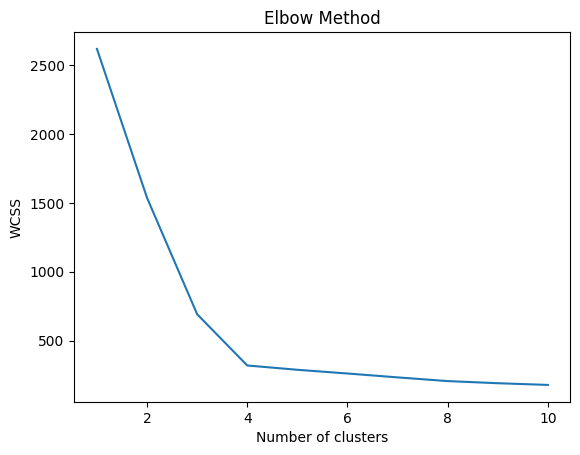

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
k = 3  # Assume the elbow point is at k=3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)

# Check the distribution of data points among the clusters
unique, counts = np.unique(pred_y, return_counts=True)
print(dict(zip(unique, counts)))


{0: 45, 1: 44, 2: 96}


In [8]:
for seed in range(0, 5):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=seed)
    kmeans.fit(df)
    print(f'Centroids for seed {seed}: {kmeans.cluster_centers_}')


Centroids for seed 0: [[7.94764649 1.74273104 8.41827845 5.34597712]
 [2.94198167 2.94963798 9.05393187 9.26234388]
 [3.09892157 1.71248961 7.40839702 3.5945952 ]]
Centroids for seed 1: [[3.09892157 1.71248961 7.40839702 3.5945952 ]
 [7.94764649 1.74273104 8.41827845 5.34597712]
 [2.94198167 2.94963798 9.05393187 9.26234388]]
Centroids for seed 2: [[3.09892157 1.71248961 7.40839702 3.5945952 ]
 [2.94198167 2.94963798 9.05393187 9.26234388]
 [7.94764649 1.74273104 8.41827845 5.34597712]]
Centroids for seed 3: [[2.94198167 2.94963798 9.05393187 9.26234388]
 [3.09892157 1.71248961 7.40839702 3.5945952 ]
 [7.94764649 1.74273104 8.41827845 5.34597712]]
Centroids for seed 4: [[7.94764649 1.74273104 8.41827845 5.34597712]
 [2.94198167 2.94963798 9.05393187 9.26234388]
 [3.09892157 1.71248961 7.40839702 3.5945952 ]]
